In [2]:
%load_ext autoreload
%autoreload 2

# Plot data on a map

`poligrain` shall make your live easier when plotting data as points, lines and grids. In particular plotting lines from CML paths using a colormap will be easy now.

Since we enforce a fixed naming convention of site cooridnates in the `xarray.Dataset`s that we use, we do not have to fiddle with these during plotting. We can just take a `Dataset` or a `DataArray` as input for our plotting functions.

In [3]:
import matplotlib.pyplot as plt
import xarray as xr

import poligrain as plg

In [4]:
(
    ds_rad,
    ds_cmls,
    ds_gauges_municp,
    ds_gauge_smhi,
) = plg.example_data.load_openmrg_5min_2h()

File already exists at openmrg_cml_5min_2h.nc
Not downloading!
File already exists at openmrg_rad_5min_2h.nc
Not downloading!
File already exists at openmrg_municp_gauge_5min_2h.nc
Not downloading!
File already exists at openmrg_smhi_gauge_5min_2h.nc
Not downloading!


## Plot CML paths 

If we have CML data in a `xarray.Dataset` with our naming convention we can simply pass the `Dataset` to the plotting function to plot all CML paths onto a map. The lines are draw in one go using `LineCollection` of `matplotlib`, and not using a for-loop to iterate over the CMLs, so the plotting function is very fast also for large CML networks.

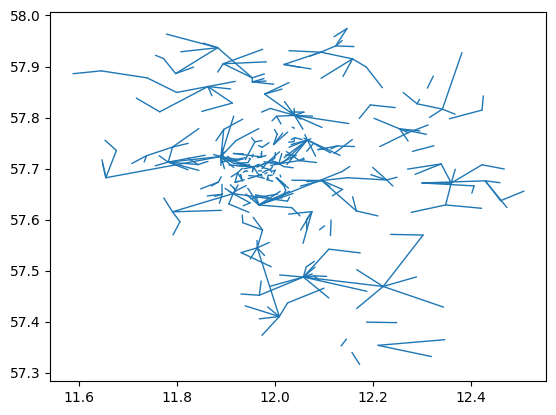

In [5]:
plg.plot_map.plot_lines(ds_cmls);

We can plot directly from the `xarray.Dataset` using the custom Accessor available via `.plg`

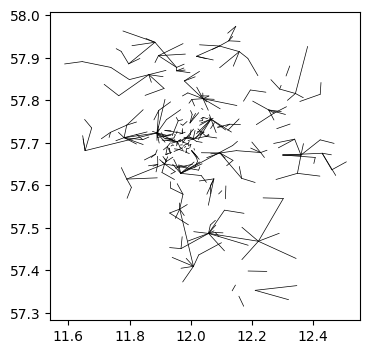

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ds_cmls.plg.plot_cmls(line_width=0.5, ax=ax, line_color="k");

If we use an `xarray.DataArray`, as a subset of the CML `Dataset` that we did load above, we can easily color the lines based on the values of each CML.

Note that there must not be more than one value per CML, i.e. you have to subset to one `sublink_id` (if you have two, which is the common case) and to one `time` step.

Below, this is shown for the rain rate per CML from a processed example data. Here only one sublink is provide, hence, we do not have to subset.

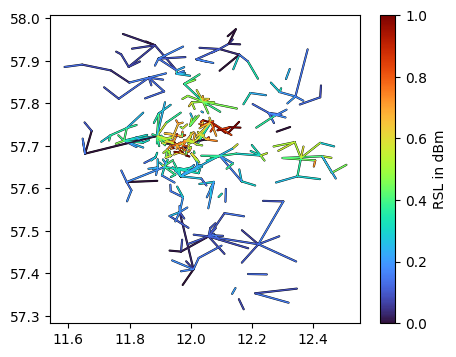

In [20]:
da_R = ds_cmls.R.isel(time=11)

fig, ax = plt.subplots(figsize=(5, 4))
lines = da_R.plg.plot_cmls(pad_width=0.5, cmap="turbo", vmin=0, vmax=1, ax=ax)
plt.colorbar(lines, label="RSL in dBm");

This way, we can also easily add color based on CML frequency.

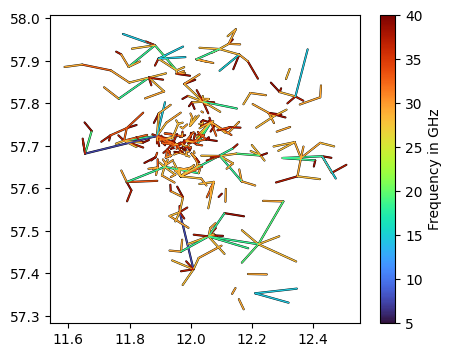

In [22]:
fig, ax = plt.subplots(figsize=(5, 4))
da_f_GHz = ds_cmls.frequency / 1e3
lines = da_f_GHz.plg.plot_cmls(pad_width=0.5, vmin=5, vmax=40, cmap="turbo", ax=ax)
plt.colorbar(lines, label="Frequency in GHz");

## Plot SML paths

to be added...

## Plot gauges

In [23]:
# import matplotlib.pyplot as plt
# import xarray as xr

# import poligrain as plg

ds_pws = xr.open_dataset(
    "../../../pypwsqc/docs/notebooks/OpenSense_PWS_example_format_data.nc"
)
ds_pws = ds_pws.rename({"longitude": "lon", "latitude": "lat"})
ds_pws

<xarray.Dataset> Size: 237MB
Dimensions:    (time: 219168, id: 134)
Coordinates:
  * time       (time) datetime64[ns] 2MB 2016-05-01T00:05:00 ... 2018-06-01
  * id         (id) <U6 3kB 'ams1' 'ams2' 'ams3' ... 'ams132' 'ams133' 'ams134'
    elevation  (id) <U3 2kB ...
    lat        (id) float64 1kB ...
    lon        (id) float64 1kB ...
Data variables:
    rainfall   (id, time) float64 235MB ...
Attributes:
    title:                 PWS data from Amsterdam
    file author:           Maximilian Graf
    institution:           Wageningen University and Research, Department of ...
    date:                  2022-10-18 10:32:00
    source:                Netamo PWS
    history:               Data derived and reformated from the originally pu...
    naming convention:     OpenSense-0.1
    license restrictions:  CC-BY 4.0 https://creativecommons.org/licenses/by/...
    reference:             https://doi.org/10.1029/2019GL083731
    comment:

In [24]:
plg.plot_map.plot_plg(
    da_gauges=ds_pws.rainfall.mean(dim="time"),
    use_lon_lat=True,
    vmin=0,
    vmax=0.01,
    cmap="viridis",
)

AttributeError: module 'poligrain.plot_map' has no attribute 'plot_plg'

## Plot radar data

to be added...

## Plot all sensors at the same time

In [10]:
ds_rad = xr.open_dataset("../../../mergeplg/src/mergeplg/example_data/openmrg_rad.nc")
ds_rad = ds_rad.set_coords(["longitudes", "latitudes"])
ds_rad = ds_rad.rename({"longitudes": "lon", "latitudes": "lat"})

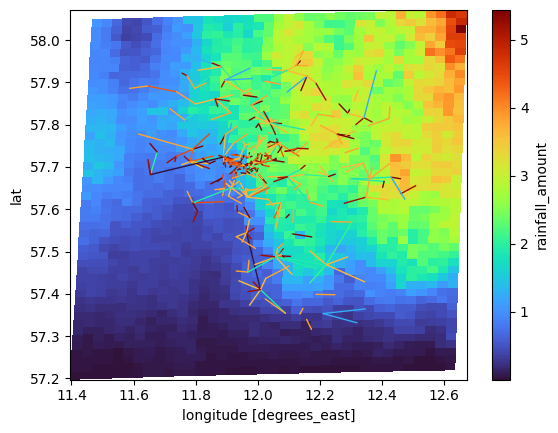

In [14]:
plg.plot_map.plot_plg(
    da_grid=ds_rad.rainfall_amount.sum(dim="time"),
    use_lon_lat=True,
    da_cmls=ds_cmls.isel(sublink_id=0).frequency,
)